In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report

In [65]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.utils import to_categorical

In [66]:
pwd

'C:\\Users\\oem\\Documents\\archana\\AI-NEURAL NETWORKS'

In [67]:
df = pd.read_csv(r"C:\\Users\\oem\\Downloads\\sonar.csv",header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [68]:
df.columns


Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57, 58, 59, 60],
           dtype='int64')

In [69]:
df.shape

(208, 61)

In [70]:
df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
     ..
56    0
57    0
58    0
59    0
60    0
Length: 61, dtype: int64

In [71]:
from sklearn.preprocessing import LabelEncoder

In [72]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]
print(x.shape)
print(y.shape)

(208, 60)
(208,)


In [73]:
y.head()

0    R
1    R
2    R
3    R
4    R
Name: 60, dtype: object

In [74]:
lb = LabelEncoder()
y = lb.fit_transform(y)
y[:5]

array([1, 1, 1, 1, 1])

In [75]:
print(list(set(y)))

[0, 1]


In [76]:
from sklearn.model_selection import train_test_split

In [77]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(156, 60)
(52, 60)
(156,)
(52,)


In [78]:
#####build the ANN classification model
#model-1(without dropout layer)

In [79]:
m1=Sequential()                                       ###input layer = 60 neurons
m1.add(Dense(60,activation='relu',input_dim=60))      ###H1 layer has 60
m1.add(Dense(30,activation='relu'))                   ###H2 has 30 neurons
m1.add(Dense(1,activation='sigmoid'))                 ###output layers has 1 neuron,activation='sigmoid'

m1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [80]:
h1 = m1.fit(x_train,y_train,epochs=30,validation_data=(x_test,y_test))

Epoch 1/30
5/5 [==============================] - 1s 44ms/step - loss: 0.7110 - accuracy: 0.4615 - val_loss: 0.6951 - val_accuracy: 0.5192
Epoch 2/30
5/5 [==============================] - 0s 11ms/step - loss: 0.6947 - accuracy: 0.4936 - val_loss: 0.6844 - val_accuracy: 0.5962
Epoch 3/30
5/5 [==============================] - 0s 10ms/step - loss: 0.6831 - accuracy: 0.5897 - val_loss: 0.6778 - val_accuracy: 0.5962
Epoch 4/30
5/5 [==============================] - 0s 10ms/step - loss: 0.6743 - accuracy: 0.6282 - val_loss: 0.6708 - val_accuracy: 0.6538
Epoch 5/30
5/5 [==============================] - 0s 8ms/step - loss: 0.6657 - accuracy: 0.6538 - val_loss: 0.6623 - val_accuracy: 0.6731
Epoch 6/30
5/5 [==============================] - 0s 10ms/step - loss: 0.6574 - accuracy: 0.6667 - val_loss: 0.6536 - val_accuracy: 0.6923
Epoch 7/30
5/5 [==============================] - 0s 10ms/step - loss: 0.6487 - accuracy: 0.6731 - val_loss: 0.6441 - val_accuracy: 0.7115
Epoch 8/30
5/5 [============

In [81]:
r1 = pd.DataFrame(h1.history)
r1['Epochs']=h1.epoch
r1.tail(10)

,loss,accuracy,val_loss,val_accuracy,Epochs
20,0.467277,0.833333,0.518619,0.750000,20
21,0.454330,0.807692,0.523126,0.730769,21
22,0.444314,0.820513,0.510243,0.730769,22
23,0.428852,0.833333,0.509129,0.750000,23
24,0.424132,0.833333,0.507747,0.769231,24
25,0.408068,0.820513,0.511436,0.769231,25
26,0.403746,0.807692,0.510125,0.769231,26
27,0.390452,0.826923,0.501577,0.730769,27
28,0.392545,0.852564,0.502436,0.769231,28
29,0.377372,0.833333,0.517954,0.750000,29


In [82]:
#### model-2(without dropout layer)

In [83]:
m2 = Sequential()                                     ###input layer = 60 neurons
m2.add(Dense(60,activation='relu',input_dim=60)) 
m2.add(Dropout(0.4))                                  ###H1 layer has 60
m2.add(Dense(30,activation='relu'))
m2.add(Dropout(0.4))                                  ###H2 has 30 neurons
m2.add(Dense(1,activation='sigmoid'))                 ###output layers has 1 neuron,activation='sigmoid'

m2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [84]:
h2 = m2.fit(x_train,y_train,epochs=30,validation_data=(x_test,y_test))

Epoch 1/30
5/5 [==============================] - 1s 46ms/step - loss: 0.7048 - accuracy: 0.5449 - val_loss: 0.6840 - val_accuracy: 0.6346
Epoch 2/30
5/5 [==============================] - 0s 9ms/step - loss: 0.7058 - accuracy: 0.4936 - val_loss: 0.6723 - val_accuracy: 0.6154
Epoch 3/30
5/5 [==============================] - 0s 10ms/step - loss: 0.6910 - accuracy: 0.5128 - val_loss: 0.6656 - val_accuracy: 0.6154
Epoch 4/30
5/5 [==============================] - 0s 10ms/step - loss: 0.6767 - accuracy: 0.5513 - val_loss: 0.6612 - val_accuracy: 0.5962
Epoch 5/30
5/5 [==============================] - 0s 8ms/step - loss: 0.6912 - accuracy: 0.5449 - val_loss: 0.6576 - val_accuracy: 0.6538
Epoch 6/30
5/5 [==============================] - 0s 8ms/step - loss: 0.6547 - accuracy: 0.6154 - val_loss: 0.6545 - val_accuracy: 0.6538
Epoch 7/30
5/5 [==============================] - 0s 8ms/step - loss: 0.6472 - accuracy: 0.6026 - val_loss: 0.6508 - val_accuracy: 0.6346
Epoch 8/30
5/5 [===============

In [85]:
r2 = pd.DataFrame(h1.history)
r2['Epochs']=h2.epoch
r2.tail(10)

,loss,accuracy,val_loss,val_accuracy,Epochs
20,0.467277,0.833333,0.518619,0.750000,20
21,0.454330,0.807692,0.523126,0.730769,21
22,0.444314,0.820513,0.510243,0.730769,22
23,0.428852,0.833333,0.509129,0.750000,23
24,0.424132,0.833333,0.507747,0.769231,24
25,0.408068,0.820513,0.511436,0.769231,25
26,0.403746,0.807692,0.510125,0.769231,26
27,0.390452,0.826923,0.501577,0.730769,27
28,0.392545,0.852564,0.502436,0.769231,28
29,0.377372,0.833333,0.517954,0.750000,29


In [86]:
####callbacks

In [87]:
from sklearn.datasets import make_moons

In [88]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss',patience=5)


In [89]:
x,y = make_moons(n_samples=100,noise=0.2,random_state=1)
print(x.shape)
print(y.shape)

(100, 2)
(100,)


In [90]:
print(type(x),type(y))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [91]:
x[:5]

array([[ 1.36698238, -0.23541584],
       [ 1.76404402, -0.34563288],
       [-0.37868174,  0.41004375],
       [ 1.15113747, -0.13597622],
       [ 2.31168314,  0.32295125]])

In [94]:
y[:5]

array([1, 1, 0, 1, 1], dtype=int64)

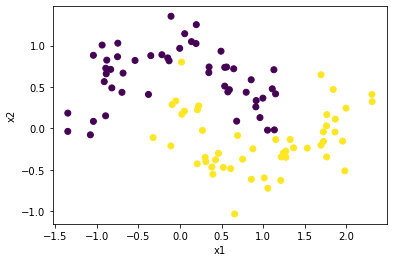

In [95]:
plt.scatter(x[:,0],x[:,1],c=y)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [97]:
x_tr,x_te,y_tr,y_te = train_test_split(x,y,test_size=0.25)
print(x_tr.shape)
print(x_te.shape)
print(y_tr.shape)
print(y_te.shape)

(75, 2)
(25, 2)
(75,)
(25,)


In [98]:
####build the ANN classification model with early stopping call backs

In [102]:
m3 = Sequential()
m3.add(Dense(100,activation='relu',input_dim=2))
m3.add(Dense(50,activation='relu'))
m3.add(Dense(1,activation='sigmoid'))

m3.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [105]:
es = EarlyStopping(monitor='val_loss',patience=3)

h3 = m3.fit(x_tr,y_tr,epochs=100,validation_data=(x_te,y_te),callbacks=[es])

Epoch 1/100
3/3 [==============================] - 1s 79ms/step - loss: 0.7220 - accuracy: 0.3600 - val_loss: 0.6975 - val_accuracy: 0.4800
Epoch 2/100
3/3 [==============================] - 0s 17ms/step - loss: 0.6829 - accuracy: 0.6800 - val_loss: 0.6559 - val_accuracy: 0.8000
Epoch 3/100
3/3 [==============================] - 0s 16ms/step - loss: 0.6516 - accuracy: 0.7867 - val_loss: 0.6183 - val_accuracy: 0.9200
Epoch 4/100
3/3 [==============================] - 0s 16ms/step - loss: 0.6197 - accuracy: 0.8000 - val_loss: 0.5845 - val_accuracy: 0.9200
Epoch 5/100
3/3 [==============================] - 0s 12ms/step - loss: 0.5891 - accuracy: 0.8000 - val_loss: 0.5547 - val_accuracy: 0.9200
Epoch 6/100
3/3 [==============================] - 0s 16ms/step - loss: 0.5643 - accuracy: 0.8000 - val_loss: 0.5252 - val_accuracy: 0.9200
Epoch 7/100
3/3 [==============================] - 0s 12ms/step - loss: 0.5407 - accuracy: 0.8000 - val_loss: 0.4970 - val_accuracy: 0.9200
Epoch 8/100
3/3 [===

In [110]:
r3 = pd.DataFrame(h3.history)
r3['Epochs'] = h3.epoch
r3.tail(7)

,loss,accuracy,val_loss,val_accuracy,Epochs
46,0.280810,0.853333,0.198831,0.92,46
47,0.279966,0.853333,0.197433,0.92,47
48,0.278551,0.853333,0.197053,0.92,48
49,0.276275,0.853333,0.195699,0.92,49
50,0.275248,0.853333,0.197435,0.92,50
51,0.270726,0.853333,0.197208,0.92,51
52,0.268477,0.853333,0.196747,0.92,52


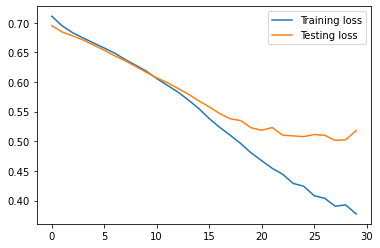

In [114]:
plt.plot(r1['Epochs'],r1['loss'],label='Training loss')
plt.plot(r1['Epochs'],r1['val_loss'],label='Testing loss')
plt.legend()
plt.show()